# FAO exercice

In [473]:
# init
import pandas as pd
import numpy as np

df_anim = pd.read_csv("FAOSTAT_animal.csv")
df_veg = pd.read_csv("FAOSTAT_vegetal.csv")
df_pop = pd.read_csv("FAOSTAT_population.csv")

## Explore the initial data

In [474]:
print(f"\nThe first lines of df_anim:\n", df_anim.head())
print(f"\nThe first lines of df_veg:\n", df_veg.head())
print(f"\nThe first lines of df_pop:\n", df_pop.head())


The first lines of df_anim:
   Domain Code                 Domain  Area Code         Area  Element Code  \
0         FBS  Food Balances (2010-)          2  Afghanistan           645   
1         FBS  Food Balances (2010-)          2  Afghanistan           645   
2         FBS  Food Balances (2010-)          2  Afghanistan           664   
3         FBS  Food Balances (2010-)          2  Afghanistan           664   
4         FBS  Food Balances (2010-)          2  Afghanistan           674   

                                  Element  Item Code         Item  Year Code  \
0     Food supply quantity (kg/capita/yr)       2731  Bovine Meat       2018   
1     Food supply quantity (kg/capita/yr)       2731  Bovine Meat       2019   
2           Food supply (kcal/capita/day)       2731  Bovine Meat       2018   
3           Food supply (kcal/capita/day)       2731  Bovine Meat       2019   
4  Protein supply quantity (g/capita/day)       2731  Bovine Meat       2018   

   Year             

In [475]:
print(f"This is the shape of df_anim : {df_anim.shape}")
print(f"This is the shape of df_veg : {df_veg.shape}")
print(f"This is the shape of df_pop : {df_pop.shape}")

This is the shape of df_anim : (30725, 12)
This is the shape of df_veg : (90576, 12)
This is the shape of df_pop : (356, 12)


## Add a column type to *df_veg* and *df_anim*

In [476]:
df_anim = df_anim.assign(type="animal_product")
df_veg = df_veg.assign(type="vegetal_product")

## Combine *df_anim* and *df_veg*

In [477]:
product = pd.concat([df_anim, df_veg], ignore_index=True)

## Only keep country code, country, year and population in df_pop

In [478]:
df_pop = df_pop.loc[:, ["Area Code", "Area", "Year", "Value"]]

## Rename columns

In [479]:
def change_name(name):
  return name.lower().replace(" ", "_")

df_pop = df_pop.rename(columns=change_name)
product = product.rename(columns=change_name)

## Merge *df_pop* and *product*

In [480]:
print(product.shape)
df = pd.merge(product, df_pop, on=["area", "year"], suffixes=("_product", "_pop"), how="inner")
print(df.shape)

(121301, 13)
(121301, 15)


In [481]:
df.head()

,domain_code,domain,area_code_product,area,element_code,element,item_code,item,year_code,year,unit,value_product,type,area_code_pop,value_pop
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,animal_product,2,37172
1,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.00,animal_product,2,37172
2,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,animal_product,2,37172
3,FBS,Food Balances (2010-),2,Afghanistan,684,Fat supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.20,animal_product,2,37172
4,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2732,Mutton & Goat Meat,2018,2018,kg,4.26,animal_product,2,37172


## Check DataTypes and modify if needed

In [482]:
df.dtypes

domain_code           object
domain                object
area_code_product      int64
area                  object
element_code           int64
element               object
item_code              int64
item                  object
year_code              int64
year                   int64
unit                  object
value_product        float64
type                  object
area_code_pop          int64
value_pop              int64
dtype: object

## Check missing values and visualize them

In [483]:
null_values = df.isnull().sum(axis=1)

In [484]:
import missingno as msno

<AxesSubplot:>

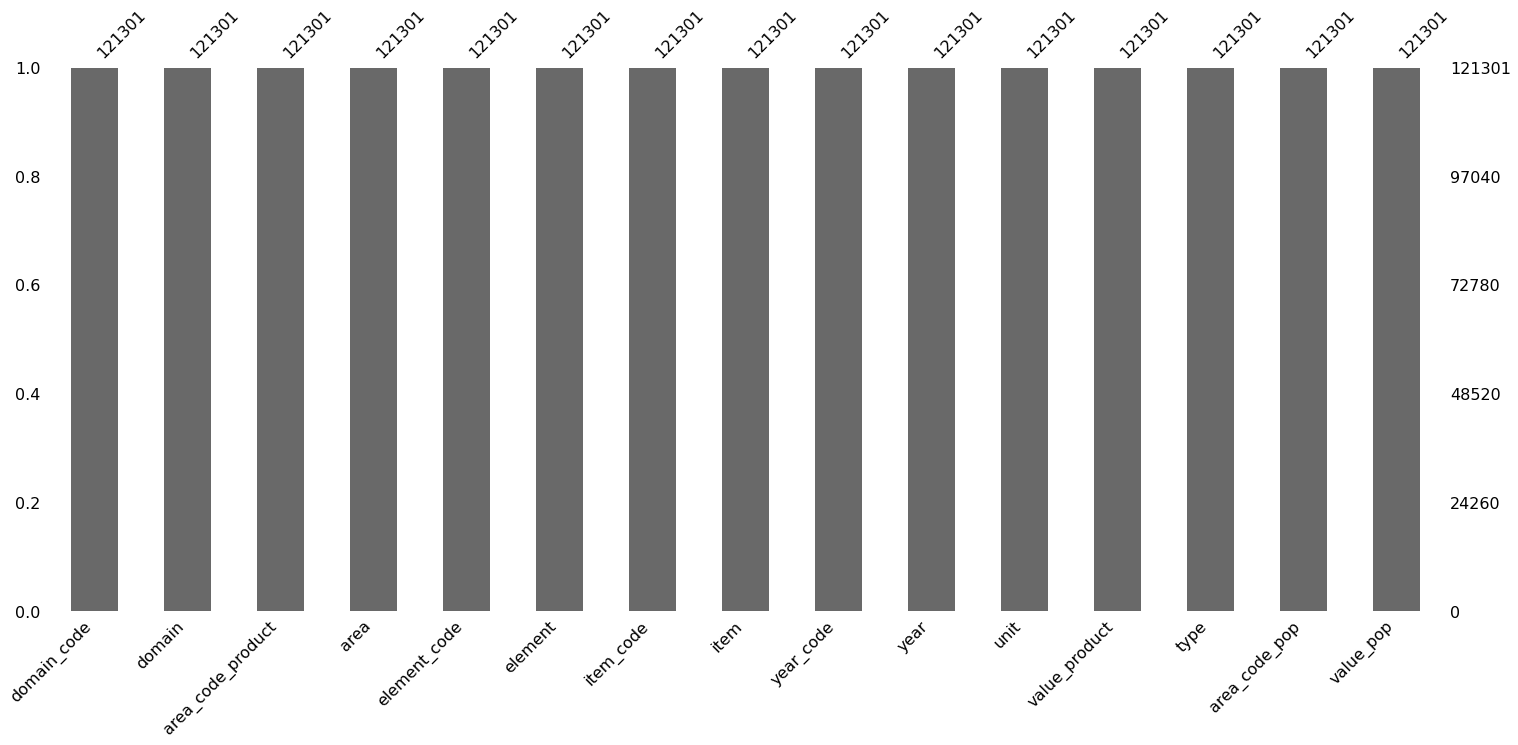

In [485]:
msno.bar(df)

## Find if there is weird values and drop them

In [486]:
weird_values = df.loc[(df.value_product < 0) | (df.value_pop < 0)]

In [487]:
print(df.shape)
df.drop(weird_values.index, inplace=True)
print(df.shape)

(121301, 15)
(121299, 15)


## Improve column's names and clean

In [488]:
df = df.rename(columns={"area_code_product": "area_code", "value_pop": "pop_1000_hab"})
df = df.drop(["area_code_pop", "domain", "domain_code", "year_code"], axis=1)
df.head()

,area_code,area,element_code,element,item_code,item,year,unit,value_product,type,pop_1000_hab
0,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,kg,2.62,animal_product,37172
1,2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,kcal/capita/day,15.00,animal_product,37172
2,2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,g/capita/day,1.09,animal_product,37172
3,2,Afghanistan,684,Fat supply quantity (g/capita/day),2731,Bovine Meat,2018,g/capita/day,1.20,animal_product,37172
4,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2732,Mutton & Goat Meat,2018,kg,4.26,animal_product,37172


## Show Area's unique values

In [489]:
df.area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "C?te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gamb

## Rename *area_code* and *area* to clearer names

In [490]:
df = df.rename(columns={"area_code": "area_country", "area": "country"})

## Modify values so that 

In [491]:
df = df.pivot(index=["area_country", "country", "year", "pop_1000_hab", "item", "type"],columns="element", values="value_product")
df = df.reset_index()
df.head()

element,area_country,country,year,pop_1000_hab,item,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2952,Apples and products,vegetal_product,0.12,20.0,14.49,0.05
1,1,Armenia,2018,2952,"Aquatic Animals, Others",animal_product,0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952,Aquatic Plants,animal_product,0.00,0.0,0.00,0.00
3,1,Armenia,2018,2952,Bananas,vegetal_product,0.06,13.0,7.61,0.15
4,1,Armenia,2018,2952,Barley and products,vegetal_product,0.03,6.0,0.72,0.20


## Create masks to filter by year

In [492]:
from2018 = df.year == 2018
from2019 = df.year == 2019

## Mark the least developed countries

In [493]:
least_developed = pd.read_csv("regions/FAOSTAT_least_developed_countries.csv")
df['developed'] = np.logical_not(df.country.isin(least_developed.Area))

## Mark the continents

In [500]:
europe = pd.read_csv("regions/FAOSTAT_europe.csv")
africa = pd.read_csv("regions/FAOSTAT_africa.csv")
asia = pd.read_csv("regions/FAOSTAT_asia.csv")
america = pd.read_csv("regions/FAOSTAT_americas.csv")
oceania = pd.read_csv("regions/FAOSTAT_oceania.csv")

In [501]:
df.loc[df["country"].isin(europe.Area), "continent"] = "europe"
df.loc[df["country"].isin(africa.Area), "continent"] = "africa"
df.loc[df["country"].isin(asia.Area), "continent"] = "asia"
df.loc[df["country"].isin(america.Area), "continent"] = "america"
df.loc[df["country"].isin(oceania.Area), "continent"] = "oceania"

In [502]:
df

element,area_country,country,year,pop_1000_hab,item,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day),developed,continent
0,1,Armenia,2018,2952,Apples and products,vegetal_product,0.12,20.0,14.49,0.05,True,asia
1,1,Armenia,2018,2952,"Aquatic Animals, Others",animal_product,0.00,0.0,0.00,0.00,True,asia
2,1,Armenia,2018,2952,Aquatic Plants,animal_product,0.00,0.0,0.00,0.00,True,asia
3,1,Armenia,2018,2952,Bananas,vegetal_product,0.06,13.0,7.61,0.15,True,asia
4,1,Armenia,2018,2952,Barley and products,vegetal_product,0.03,6.0,0.72,0.20,True,asia
...,...,...,...,...,...,...,...,...,...,...,...,...
30495,276,Sudan,2019,42813,Tomatoes and products,vegetal_product,0.10,9.0,15.36,0.41,False,africa
30496,276,Sudan,2019,42813,"Vegetables, other",vegetal_product,0.14,20.0,27.51,0.90,False,africa
30497,276,Sudan,2019,42813,Wheat and products,vegetal_product,1.67,535.0,61.56,16.00,False,africa
30498,276,Sudan,2019,42813,Wine,vegetal_product,0.00,0.0,0.00,0.00,False,africa
